In [1]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# freecodecamp - Rock Scissor Paper challenge -

As part of the "Machine Learning Path", freecodecamp let you do <B>"Rock, Paper, Scissors"</B> Project where you have to change a provided function called <I>Player</I>. You can find the function within the <I>RPS.py</I>-File, which is the only file besides the <I>main.py</I>-File you should modify!

Below you will find a way with description how to solve this problem. More information about <B>"Rock, Paper, Scissors"</B> and a Python contest where other enthusiasts create bots that even reach a win rate of 80% can be found here: [<B>RPSCONTEST</B>](http://www.rpscontest.com/) please note the contest is finished, but you still find the bots plus code.

#### Load bot's

In [2]:
from RPS_game import play, mrugesh, abbey, quincy, kris, human, random_player

##### fcc's initial "player" function, which have to be adapt

In [3]:
def player(prev_play, opponent_history=[]):
    # opponent_history = set() if opponent_history is None else opponent_history
    # opponent_history = opponent_history if opponent_history.count('') < 2 else []
    opponent_history.append(prev_play)
    # print(opponent_history)
    
    guess = "R"
    if len(opponent_history) > 2:
        guess = opponent_history[-2]

    return guess

##### Check the inital winning rate of fcc against the other bots

In [4]:
players = {"Abbey" : abbey,
           "fcc" : player,
           "Kris" : kris,
           "Mrugesh" : mrugesh,
           "Quincy" : quincy}
n_games = 1000

In [5]:
def play_scheme(player):
    rate = {"Abbey" : [],
            "Kris" : [],
            "Mrugesh" : [],
            "Quincy" : []
           }
    
    for name in rate.keys():
        rate[name] = play(player, players[name], num_games=1000)
    
    return rate

In [6]:
winning_rate = play_scheme(player)

Final results: {'p1': 15, 'p2': 650, 'tie': 335}
Player 1 win rate: 2.2556390977443606%
Final results: {'p1': 334, 'p2': 0, 'tie': 665}
Player 1 win rate: 100.0%
Final results: {'p1': 0, 'p2': 272, 'tie': 727}
Player 1 win rate: 0.0%
Final results: {'p1': 201, 'p2': 798, 'tie': 0}
Player 1 win rate: 20.12012012012012%


In [7]:
def barplot(rate):
    fig, ax=plt.subplots()
    color = ["tab:red", "tab:blue", "black", "tab:green"]
    ax.bar(rate.keys(), rate.values(), color=color)
    ax.set_ylabel("Winning rate (%)", fontsize=14)
    plt.show()

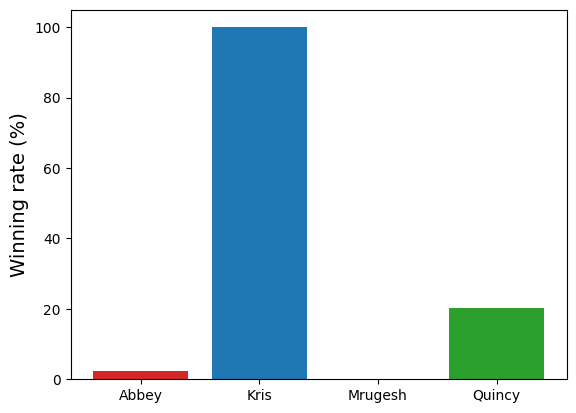

In [8]:
barplot(winning_rate)

With the initial code provided, we only beat <I>Kris</I>, against the other bots our win rate is roughly miserable. To understand why this is, let's now take a look at the four bots provided by <I>fcc</I> and try to understand them.

### Analysing the bots

Let's start alphabetical with <B>Abbey</B>'s code:
```Python
def abbey(prev_opponent_play,
          opponent_history=[],
          play_order=[{
              "RR": 0,
              "RP": 0,
              "RS": 0,
              "PR": 0,
              "PP": 0,
              "PS": 0,
              "SR": 0,
              "SP": 0,
              "SS": 0,
          }]):
    
    if not prev_opponent_play:
        prev_opponent_play = 'R'
    opponent_history.append(prev_opponent_play)

    last_two = "".join(opponent_history[-2:])
    if len(last_two) == 2:
        play_order[0][last_two] += 1

    potential_plays = [
        prev_opponent_play + "R",
        prev_opponent_play + "P",
        prev_opponent_play + "S",
    ]

    sub_order = {
        k: play_order[0][k]
        for k in potential_plays if k in play_order[0]
    }

    prediction = max(sub_order, key=sub_order.get)[-1:]

    ideal_response = {'P': 'S', 'R': 'P', 'S': 'R'}

    return ideal_response[prediction]
```
<I>Abbey</I> get the previous oponnend move as a input parameter. Furthermore, the bot save this play in a history variable, which is by default a empty list. You only need this argument if you want to keep track of the opponent history. 
<div class="alert alert-block alert-danger">
<b>Just don't:</b> An empty list to store the opponent history is not an ideal solution. It can/will cause problems when you want to replay games or when you try to play different combinations, especially in a notebook environment. Since the history does not empty after each session (<code>play(player, abbey, 1000)</code>) it automatically skew the repeatability. So, for example, if you play against Abbey you will get a different result for each new session (<code>[play(player, abbey, 1000) for i in range(10)]</code>). Here this approach is provided by fcc, but for your own codes in the future I recommend you check this out:
<a href="https://www.oreilly.com/library/view/python-cookbook/0596001673/ch17s08.html">memoising</a> or <a href="https://en.wikipedia.org/wiki/Memoization">wikipedia</a>
</div>
Beside this variable, the bot has also a dictionary of all possible correlations of <code>["R", "P", "S"]</code> with itself. This means that the bot <I>Abbey</I> uses the opponent's previous play <code>prev_opponent_play</code> and the current possible play <code>potential_plays</code> (previous plus possible moves) to predict the actual move. For example, if the previous move was <B>Rock</B> than the possible actual moves could be <B>Rock</B>, <B>Paper</B> or <B>Scissor</B> (<code>["RR", "RP", "RS"]</code>). Now let's assume that our opponent will play the combination, which is represented most frequently within our <code>play_order</code> out of the 3 possible ones. The <code>play_order</code> dictionary has a size of $3 \times 3$ and by default every combination is assigned zero. Within <code>sub_order</code>, we check the previous frequency of our opponent's possible moves by selecting the most common combination within <code>sub_order</code> as our <code>prediction</code>. According to this prediction, the bot will choose its <code>ideal_response</code>. This is a kind of a simple <a href="https://towardsdatascience.com/hands-on-markov-chains-example-using-python-8138bf2bd971">Markov-chain</a>.

<B>Kris</B>'s code:
```Python
def kris(prev_opponent_play):
    if prev_opponent_play == '':
        prev_opponent_play = "R"
    ideal_response = {'P': 'S', 'R': 'P', 'S': 'R'}
    return ideal_response[prev_opponent_play]
```
<I>Kris</I> is a much simpler bot than <I>Abbey</I>. The bot only get the previous oponnend move as a input parameter and assumes that his opponent will throw the same move again. His first guess is that his opponent will also play <B>Rock</B>.

<B>Mrugesh</B>'s code:
```Python
def mrugesh(prev_opponent_play, opponent_history=[]):
    opponent_history.append(prev_opponent_play)
    last_ten = opponent_history[-10:]
    most_frequent = max(set(last_ten), key=last_ten.count)

    if most_frequent == '':
        most_frequent = "S"

    ideal_response = {'P': 'S', 'R': 'P', 'S': 'R'}
    return ideal_response[most_frequent]
```
<I>Mrugesh</I> takes the opponent's previous move as an input parameter and an argument that records his opponent's history, which by default is an empty list. This opponent history is needed because the bot assumes that his opponent has a game pattern where he wants to beat the most frequent move from the last ten games in each case. The bots initial guess is <B>Scissor</B>, a move which is also suggested by [Graham Walker](https://statmodeling.stat.columbia.edu/2007/05/21/how_to_win_at_r/).

<B>Quincy</B>'s code:
```PYthon
def quincy(prev_play, counter=[0]):

    counter[0] += 1
    choices = ["R", "R", "P", "P", "S"]
    return choices[counter[0] % len(choices)]
```
<I>Quincy</I> plays a simple pattern <code>["R", "P", "P", "S", "R"]</code> that repeats every 5 games. For this he has a counter as input parameter, which is 0 by default. Also, like all other bots, he has his opponent's previous move as an input parameter, which he does not need at all. His first move is <B>Rock</B>.

And finally, let's take a look to the provided code from <B>freecodecamp</B>:
```Python
def player(prev_play, opponent_history=[]):
    opponent_history.append(prev_play)

    guess = "R"
    if len(opponent_history) > 2:
        guess = opponent_history[-2]

    return guess
```
In the initial situation, the bot "<I>player</I>" takes his opponent's official move and stores it in a history argument, which is a empty list by default. In the his first two turns, he plays <B>Rock</B>. After the second game, he will repeat his opponent's move before last.

### Modifying the <code>player(prev_play):</code> function

Now we try to beat our competitors. To pass this challenge, our program must play against all four different bots and win at least more than 60% of the games. Furthermore, we want to keep our function as simple as possible and therefore we will not load any additional packages.<br>First, however, let's verify that the statement that randomly guessing the moves gives a 50% chance of winning is true. (therefore we need numpy's random choice)

##### Random choice

In [9]:
def random_player(prev_play, opponent_history=[]):
    opponent_history.append(prev_play)

    possible_choices = ["R", "P", "S"]  # ["Rock", "Paper", "Scissor"]
    choice = np.random.choice(possible_choices, 1)    
    return str(choice[0])

In [12]:
random_winning_rate = play_scheme(random_player)

Final results: {'p1': 323, 'p2': 316, 'tie': 361}
Player 1 win rate: 50.54773082942097%
Final results: {'p1': 337, 'p2': 341, 'tie': 322}
Player 1 win rate: 49.70501474926254%
Final results: {'p1': 322, 'p2': 359, 'tie': 319}
Player 1 win rate: 47.28340675477239%
Final results: {'p1': 339, 'p2': 328, 'tie': 333}
Player 1 win rate: 50.82458770614693%


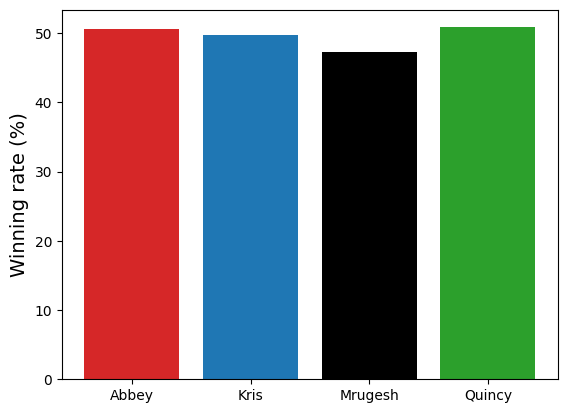

In [13]:
barplot(random_winning_rate)

As expected, we reach nearby a 50% winning rate against all other bots (a similar function is also provided by <B>fcc</B>). However, we cannot achieve the requirements of at least slightly more than 60% with this approach.

##### Modifying <B>Abbey</B>'s code by changing the number of last games!

In [15]:
def abbey_modified(prev_play, opponent_history=[], n_last_games=5, play_order={}):
    ideal_response = {"R" : "P", "P" : "S", "S" : "R"}
    prediction = "S"  # initial choice "Scissor First"!

    if not prev_play:
        prev_play = prediction
    opponent_history.append(prev_play)

    if len(opponent_history) > (n_last_games - 1):
        last_games = "".join(opponent_history[-n_last_games:])
        play_order[last_games] = play_order.get(last_games, 0) + 1
        potential_plays = ["".join([*opponent_history[-(n_last_games-1):], move])
                           for move in list(ideal_response.keys())]
        
        sub_order = {k : play_order[k]
                     for k in potential_plays
                     if k in play_order
                    }
        
        if sub_order:
            prediction = max(sub_order, key=sub_order.get)[-1:]

    return ideal_response[prediction]

In [16]:
abbey_modified_winning_rate = play_scheme(abbey_modified)

Final results: {'p1': 808, 'p2': 107, 'tie': 85}
Player 1 win rate: 88.30601092896175%
Final results: {'p1': 1000, 'p2': 0, 'tie': 0}
Player 1 win rate: 100.0%
Final results: {'p1': 820, 'p2': 168, 'tie': 12}
Player 1 win rate: 82.99595141700405%
Final results: {'p1': 983, 'p2': 15, 'tie': 2}
Player 1 win rate: 98.49699398797596%


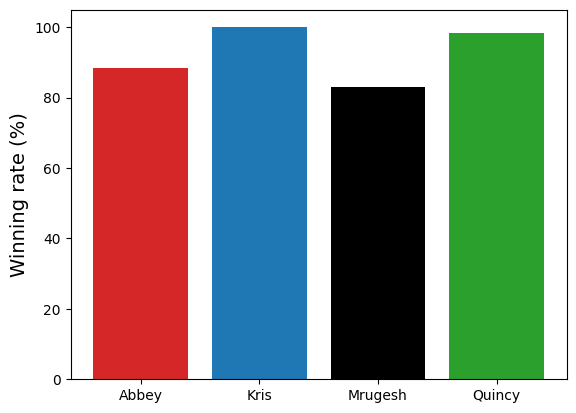

In [17]:
barplot(abbey_modified_winning_rate)

This result should be treated with caution. As mentioned before with <I>Abbey</I>, the opponent history does not empty. This means that the gameplay of <I>Abbey</I> and <I>Mrugesh</I> does not resemble a fresh game with empty history.
Anyway, you can use this code for the <I>RPS.py</I>-File and also play with the function arguments, vary the number of <code>n_last_games</code> or change the <code>prediction</code> to achieve the desired quota. 
Here are the <B>real</B> results with the function <code>abbey_modified</code>:

<div class="alert alert-block alert-warning">
<b>Example:</b><br><br>
Testing game against abbey...<br>
Final results: {'p1': 518, 'p2': 278, 'tie': 204}<br>
Player 1 win rate: 65.07537688442211%<br>
.Testing game against kris...<br>
Final results: {'p1': 484, 'p2': 201, 'tie': 315}<br>
Player 1 win rate: 70.65693430656934%<br>
.Testing game against mrugesh...<br>
Final results: {'p1': 798, 'p2': 177, 'tie': 25}<br>
Player 1 win rate: 81.84615384615384%<br>
.Testing game against quincy...<br>
Final results: {'p1': 958, 'p2': 6, 'tie': 36}<br>
Player 1 win rate: 99.37759336099586%<br>
.<br>
----------------------------------------------------------------------<br>
Ran 4 tests in 0.017s<br>
<br>
OK
</div>
Have fun trying ;)

Some helpfull links for <B>Markov-Chain</B>:

https://towardsdatascience.com/hands-on-markov-chains-example-using-python-8138bf2bd971

https://towardsdatascience.com/how-to-win-over-70-matches-in-rock-paper-scissors-3e17e67e0dab

https://www.datacamp.com/tutorial/markov-chains-python-tutorial

Some interesting information about how to win <B>Rock, Paper, Scissor</B>

https://statmodeling.stat.columbia.edu/2007/05/21/how_to_win_at_r/